# 1. Introduction

Handwritten character recognition is one of the practically important issues in pattern recognition applications. The applications of digit recognition includes in bank check processing, form data entry, etc. It will reduce the manual effort for bank check processing, and validation of handwritten form.

In this project we will start with digit recognition, which can be extended to alphabates for the broadening coverage, and solving other issues related to bank check processing and form validation.

Dataset we are using is MNIST(Modified National Institute of Standards and Technology) Data, it has more than 60000 record for training and testing.


# 2. Data Wrangling

This step focuses on collecting data, organizing it, and making sure it's well defined.


## 2.1 Imports
Importing dependencies required for Digit recognition

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler

## 2.2 Load Data

We will start with Training data:

In [2]:
train_df=pd.read_csv('Raw Data/mnist_train.csv',header=None)

In [3]:
print("traing data shape:",train_df.shape)

traing data shape: (60000, 785)


In [4]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now let's also load the testing data:

In [5]:
test_df=pd.read_csv('Raw Data/mnist_test.csv',header=None)

In [6]:
print("traing data shape:",test_df.shape)

traing data shape: (10000, 785)


In [7]:
test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 359.3 MB


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 59.9 MB


At this stage, we just got information that we have 60000 2d images in our training dataset, and 10000 in test dataset. Columns of training data from 1 to 784 represents the pixel values, and column 0 represents the corrosponding label, same goes for test data.

## 2.3 Data Exploration

### 2.3.1 Missing values
Firstly, we will look for any missing values in training dataset:

In [10]:
missing_in_train = train_df.isnull().sum()>0
print(missing_in_train.sum())

0


Now, Let check in testing dataset:

In [11]:
missing_in_test = test_df.isnull().sum()>0
print(missing_in_test.sum())

0


There are no missing data in these datasets. 
Let's check the data distribution.

C:\Users\61435\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

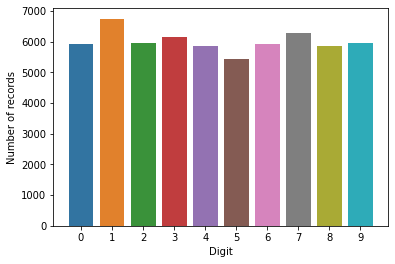

In [12]:
sns.countplot(train_df[0])
plt.xlabel('Digit')
plt.ylabel('Number of records')
plt.plot()

Test dataset is not baised. It has nearly equal number of records for each digits.

#### Summary:<br>
As there are no missing data, data bais or any other issue, we can move to next step.


# 3. Exploratory Data Analysis
Let's perform EDA to examine relationships between variables and other patterns in the data.

## 3.1 Initial Analysis

In [13]:
train_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


There are some columns with all 0's, but these might be useful in testing data.

## 3.2 Normalisation

As datasets have values from 0-255(pixel values), it will be a good idea to normalise the data.

In [14]:
x_train = train_df.drop(0,axis=1).values
y_train = train_df[0].values
x_test = test_df.drop(0,axis=1).values
y_test = test_df[0].values

In [15]:
x_train = x_train/255
x_test = x_test/255

## 3.3 Visulaize a single digit

5


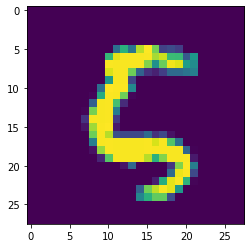

In [16]:

print(y_train[2000])
plt.imshow(x_train[2000].reshape(28,28));

7


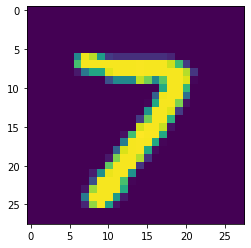

In [17]:
print(y_train[4000])
plt.imshow(x_train[4000].reshape(28,28));

9


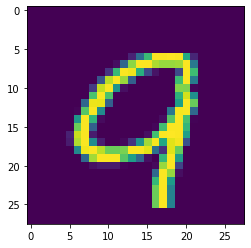

In [18]:
print(y_train[3000])
plt.imshow(x_train[3000].reshape(28,28));

0


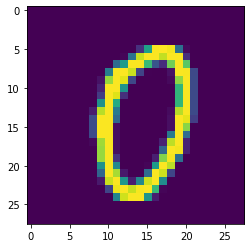

In [19]:
print(y_train[1000])
plt.imshow(x_train[1000].reshape(28,28));

## 3.4 PCA

In [20]:
standardized_scalar = StandardScaler()
standardized_data = standardized_scalar.fit_transform(x_train)
standardized_data.shape

(60000, 784)

In [21]:
pca = decomposition.PCA()
pca.n_components = 2
pca_data = pca.fit_transform(standardized_data)
pca_data.shape

(60000, 2)

In [22]:
principal_df = pd.DataFrame(data = pca_data, columns = ['principal component 1', 'principal component 2'])
principal_df.head()

,principal component 1,principal component 2
0,-0.922144,-4.814579
1,8.709029,-7.754619
2,2.328380,9.431459
3,-6.582109,-3.746499
4,-5.183215,3.133171


In [23]:
new_df = pd.concat([principal_df,train_df[0] ], axis=1)


C:\Users\61435\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


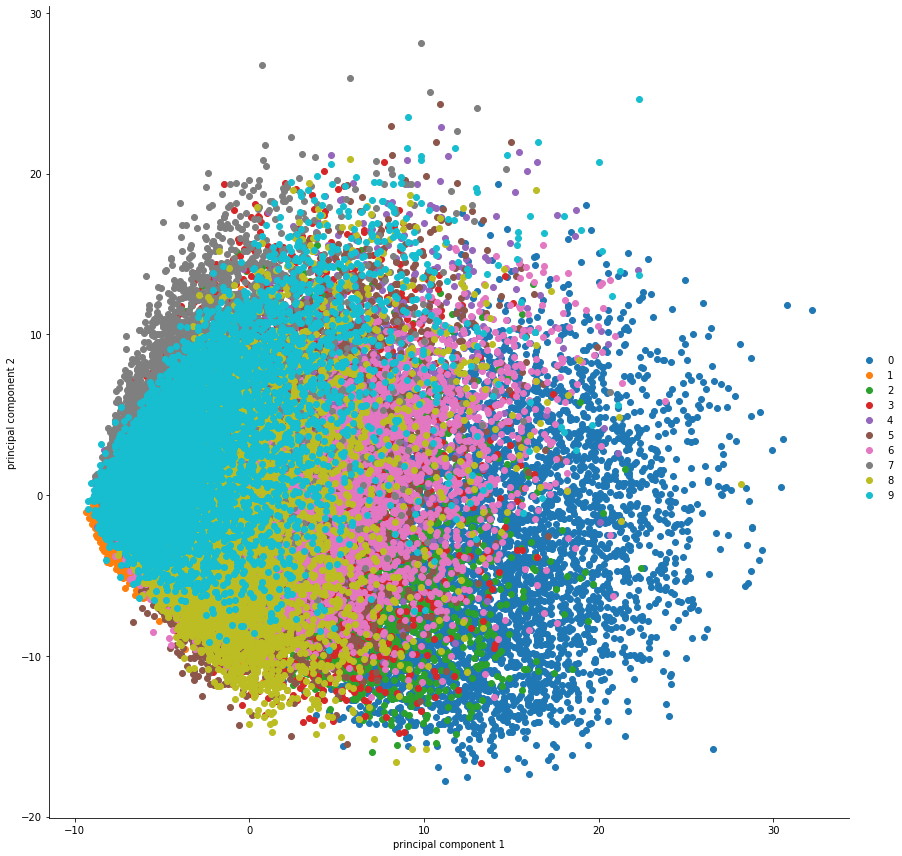

In [24]:
sns.FacetGrid(new_df,hue=0, size=12).map(plt.scatter, 'principal component 1', 'principal component 2').add_legend()
plt.savefig("PCA_FacetGrid.png")
plt.show()

It can be deduced form PCA that most of the digits are forming clusters, but most of them are overlaping clusters. We still albe to determine that cluster of 0 is distingusable from others.

### Summary:<br>
We have divided datasets in features and output. We have also normalised the features, so that it will be easier to understand the data. Finally, we performed the PCA to determine the patterns in data.

# 4.Preprocessing

## 4.0 Import 

In [25]:
from tensorflow.keras import optimizers
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Lambda, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D, AvgPool2D
from tensorflow.keras.optimizers import Adadelta
from keras.utils.np_utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.metrics import accuracy_score

## 4.1 Converting dataframe into arrays


In [26]:
#x_train = train_df.drop(0,axis=1).values
#y_train = train_df[0].values
#x_test = test_df.drop(0,axis=1).values
#y_test = test_df[0].values

train_data = np.array(x_train)
train_label = np.array(y_train)

## 4.2 Reshaping the input shapes to get it in the shape which model uses

In [27]:

train_data = train_data.reshape(train_data.shape[0], 28, 28, 1)
print(train_data.shape, train_label.shape)

(60000, 28, 28, 1) (60000,)


## 4.3 Encoding train labels

In [28]:
# Encoding the labels and making them as the class value and finally converting them as categorical values.
nclasses = train_label.max() - train_label.min() + 1
train_label = to_categorical(train_label, num_classes = nclasses)
print("Shape of ytrain after encoding: ", train_label.shape)

Shape of ytrain after encoding:  (60000, 10)


# 5. Modelling

## 5.1 Base Model ANN(Simple Neural Network)

In [29]:
model = Sequential()
model.add(Dense(units=20, activation='sigmoid',name="hidden_layer"))
model.add(Dense(units=10, activation='sigmoid',name="output_layer"))
model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer (Dense)         (60000, 20)               15700     
_________________________________________________________________
output_layer (Dense)         (60000, 10)               210       
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________


In [33]:
optimizer = optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
# This builds the model for the first time:
for epoch in range(15):
    history= model.fit(x_train,pd.get_dummies(y_train).values,epochs=epoch)

1875/1875 [==============================] - 2s 739us/step - loss: 1.7462 - accuracy: 0.5580
Epoch 1/2
1875/1875 [==============================] - 1s 638us/step - loss: 1.1198 - accuracy: 0.8114
Epoch 2/2
1875/1875 [==============================] - 1s 676us/step - loss: 0.8192 - accuracy: 0.8493
Epoch 1/3
1875/1875 [==============================] - 1s 642us/step - loss: 0.6464 - accuracy: 0.8699
Epoch 2/3
1875/1875 [==============================] - 1s 681us/step - loss: 0.5401 - accuracy: 0.8825
Epoch 3/3
1875/1875 [==============================] - 1s 650us/step - loss: 0.4709 - accuracy: 0.8913
Epoch 1/4
1875/1875 [==============================] - 1s 702us/step - loss: 0.4235 - accuracy: 0.8983
Epoch 2/4
1875/1875 [==============================] - 1s 666us/step - loss: 0.3896 - accuracy: 0.9032
Epoch 3/4
1875/1875 [==============================] - 1s 688us/step - loss: 0.3641 - accuracy: 0.9072
Epoch 4/4
1875/1875 [==============================] - 1s 663us/step - loss: 0.3443

1875/1875 [==============================] - 1s 740us/step - loss: 0.1438 - accuracy: 0.9602
Epoch 3/13
1875/1875 [==============================] - 1s 741us/step - loss: 0.1430 - accuracy: 0.9609
Epoch 4/13
1875/1875 [==============================] - 1s 737us/step - loss: 0.1423 - accuracy: 0.9607
Epoch 5/13
1875/1875 [==============================] - 2s 940us/step - loss: 0.1416 - accuracy: 0.9609
Epoch 6/13
1875/1875 [==============================] - 2s 847us/step - loss: 0.1409 - accuracy: 0.9611
Epoch 7/13
1875/1875 [==============================] - 2s 802us/step - loss: 0.1402 - accuracy: 0.9614
Epoch 8/13
1875/1875 [==============================] - 2s 885us/step - loss: 0.1394 - accuracy: 0.9614
Epoch 9/13
1875/1875 [==============================] - 2s 819us/step - loss: 0.1388 - accuracy: 0.9616
Epoch 10/13
1875/1875 [==============================] - 2s 828us/step - loss: 0.1381 - accuracy: 0.9621
Epoch 11/13
1875/1875 [==============================] - 2s 832us/step - l

In [34]:
y_pred  = model.predict(x_test)


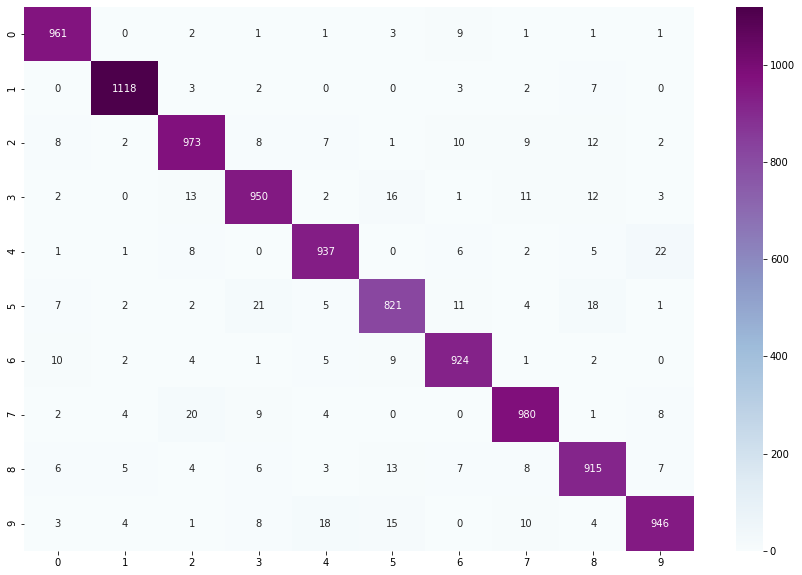

In [35]:
cf =tf.math.confusion_matrix(labels=y_test,predictions=[np.argmax(i) for i in y_pred])
plt.figure(figsize=(15,10))
sns.heatmap(cf,annot=True,fmt='d',cmap='BuPu');

In [36]:
y_pred = np.argmax(y_pred, axis=1)
accuracy_score(y_pred,y_test)

0.9525

In [37]:
def sample(i):
    print("actual label ", y_test[i])
    print("predicted label ", np.argmax(y_pred[i]))
    print("The corrosponding image")
    plt.imshow(x_test[i].reshape(28,28))

actual label  3
predicted label  0
The corrosponding image


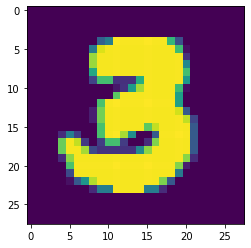

In [38]:
sample(200)

Accuracy for the base ANN model with one hidden layer is 95.25%, which is good. Let's apply CNN model as it is more suitable for image data. But before that let increase the number of node in the hidden layer.

## 5.2 ANN with one hidden layer(Increasing the number of node in the hidden layer)

In [39]:
model_2 =Sequential()
model_2.add(Dense(128,input_shape=(784,),activation='relu'))
model_2.add(Dense(10,activation='sigmoid'))


model_2.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy']
             )
for epoch in range(15):
    model_2.fit(x_train,y_train,epochs=epoch)

1875/1875 [==============================] - 2s 897us/step - loss: 0.2607 - accuracy: 0.9268
Epoch 1/2
1875/1875 [==============================] - 1s 768us/step - loss: 0.1145 - accuracy: 0.9663
Epoch 2/2
1875/1875 [==============================] - 1s 788us/step - loss: 0.0790 - accuracy: 0.9761
Epoch 1/3
1875/1875 [==============================] - 1s 761us/step - loss: 0.0598 - accuracy: 0.9820
Epoch 2/3
1875/1875 [==============================] - 1s 746us/step - loss: 0.0459 - accuracy: 0.9862
Epoch 3/3
1875/1875 [==============================] - 1s 763us/step - loss: 0.0365 - accuracy: 0.9887
Epoch 1/4
1875/1875 [==============================] - 2s 884us/step - loss: 0.0297 - accuracy: 0.9908
Epoch 2/4
1875/1875 [==============================] - 2s 859us/step - loss: 0.0236 - accuracy: 0.9928
Epoch 3/4
1875/1875 [==============================] - 2s 894us/step - loss: 0.0197 - accuracy: 0.9938
Epoch 4/4
1875/1875 [==============================] - 2s 853us/step - loss: 0.0165

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0025 - accuracy: 0.9993
Epoch 4/13
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0025 - accuracy: 0.9992
Epoch 5/13
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0013 - accuracy: 0.9997
Epoch 6/13
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0022 - accuracy: 0.9994
Epoch 7/13
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0027 - accuracy: 0.9992
Epoch 8/13
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0019 - accuracy: 0.9995
Epoch 9/13
1875/1875 [==============================] - 2s 1ms/step - loss: 4.3996e-04 - accuracy: 0.9999
Epoch 10/13
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0021 - accuracy: 0.9994
Epoch 11/13
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0023 - accuracy: 0.9992
Epoch 12/13
1875/1875 [==============================] - 2s 978us/step - loss: 0.0015 -

In [40]:
model_2.evaluate(x_test,y_test)

313/313 [==============================] - 0s 574us/step - loss: 0.2136 - accuracy: 0.9811


[0.2136123776435852, 0.9811000227928162]

In [41]:
y_pred = model_2.predict(x_test)

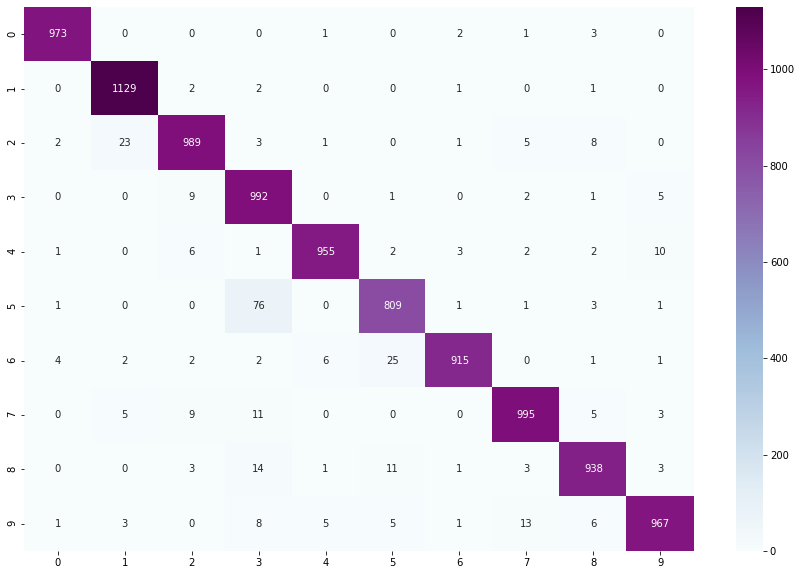

In [42]:
cf =tf.math.confusion_matrix(labels=y_test,predictions=[np.argmax(i) for i in y_pred])
plt.figure(figsize=(15,10))
sns.heatmap(cf,annot=True,fmt='d',cmap='BuPu');

actual label  3
predicted label  3
The corrosponding image


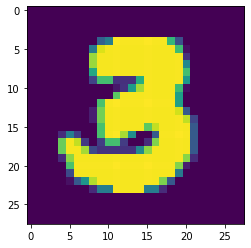

In [43]:
sample(200)

Accuracy for the this model with one hidden layer(more number of nodes) is 98.11%,  which is improvment compared to previous ANN model. Let's build more complex CCN model to achieve more accuracy.

## 5.3 Modified CNN model <br>
First we will buid functions to build, compile and train model, which will makes modelling easy.

In [68]:
def build_model(input_shape=(28, 28, 1)):
    model = Sequential()
    model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = input_shape))
    model.add(BatchNormalization())
    model.add(Conv2D(32, kernel_size = 3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(64, kernel_size = 3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size = 3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(128, kernel_size = 4, activation='relu'))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(10, activation='softmax'))
    return model

    
def compile_model(model, optimizer='adam', loss='categorical_crossentropy'):
    model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])
    
    
def train_model(model, train, test, epochs, split):
    history = model.fit(train, test, shuffle=True, epochs=epochs, validation_split=split)
    return history
   

In [69]:
cnn_model = build_model((28, 28, 1))

compile_model(cnn_model, 'adam', 'categorical_crossentropy')

model_history = train_model(cnn_model, train_data, train_label, 40, 0.2)

Epoch 1/40
1500/1500 [==============================] - 114s 76ms/step - loss: 0.1966 - accuracy: 0.9400 - val_loss: 0.0615 - val_accuracy: 0.9806
Epoch 2/40
1500/1500 [==============================] - 118s 79ms/step - loss: 0.0764 - accuracy: 0.9776 - val_loss: 0.0455 - val_accuracy: 0.9864
Epoch 3/40
1500/1500 [==============================] - 123s 82ms/step - loss: 0.0608 - accuracy: 0.9816 - val_loss: 0.0368 - val_accuracy: 0.9894
Epoch 4/40
1500/1500 [==============================] - 117s 78ms/step - loss: 0.0507 - accuracy: 0.9851 - val_loss: 0.0349 - val_accuracy: 0.9901
Epoch 5/40
1500/1500 [==============================] - 117s 78ms/step - loss: 0.0459 - accuracy: 0.9861 - val_loss: 0.0269 - val_accuracy: 0.9927
Epoch 6/40
1500/1500 [==============================] - 115s 77ms/step - loss: 0.0402 - accuracy: 0.9878 - val_loss: 0.0298 - val_accuracy: 0.9913
Epoch 7/40
1500/1500 [==============================] - 111s 74ms/step - loss: 0.0366 - accuracy: 0.9893 - val_loss: 0

Model Performance Analysis:

In [72]:
def plot_model_performance(metric, validations_metric):
    plt.plot(model_history.history[metric],label = str('Training ' + metric))
    plt.plot(model_history.history[validations_metric],label = str('Validation ' + metric))
    plt.legend()
    plt.savefig(str(metric + '_plot.png'))

Plot for Accuracy:

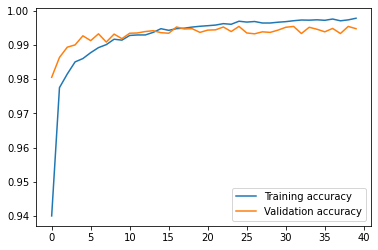

In [73]:
plot_model_performance('accuracy', 'val_accuracy')

Plot for loss:

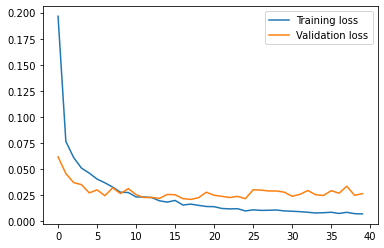

In [74]:
plot_model_performance('loss', 'val_loss')

Transforming testing data

In [75]:
#x_train = train_df.drop(0,axis=1).values
#y_train = train_df[0].values
#x_test = test_df.drop(0,axis=1).values
#y_test = test_df[0].values

test_data = np.array(x_test)
test_data = test_data.reshape(test_data.shape[0], 28, 28, 1)
print(test_data.shape)

(10000, 28, 28, 1)


Prediction:

In [76]:
predictions = cnn_model.predict(test_data)

In [81]:
y_pred = np.argmax(predictions, axis=1)
accuracy_score(y_pred,y_test)

0.9954

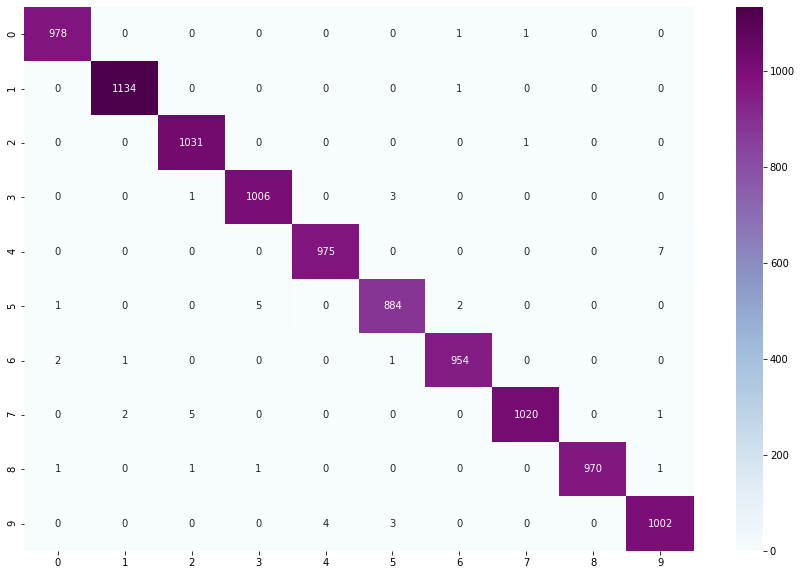

In [77]:
cf =tf.math.confusion_matrix(labels=y_test,predictions=[np.argmax(i) for i in predictions])
plt.figure(figsize=(15,10))
sns.heatmap(cf,annot=True,fmt='d',cmap='BuPu');

actual label  3
predicted label  3
The corrosponding image


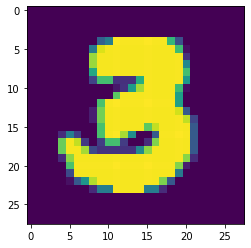

In [78]:
sample(200)

We achieved the accuracy of 99.54% using modified CNN model, which is great.

Now, let's test this model with new images. Loading more test data:

### 5.4 Testing with more images

In [99]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


In [103]:
DATADIR_PATH ='C:/Users/61435/Desktop/SpringBoard_Assignments/Capstone Project 3/Capstone3/Raw Data/Self Drawn image'
LABEL=['1']

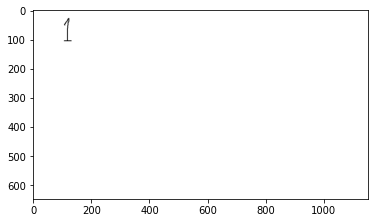

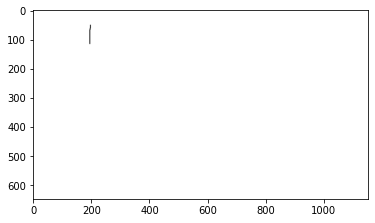

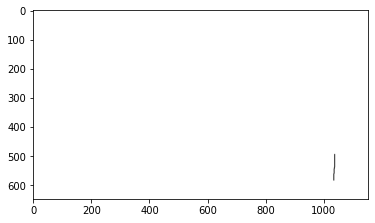

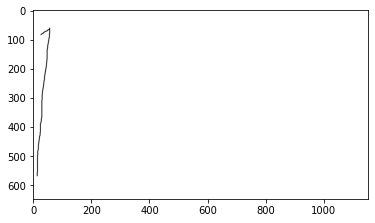

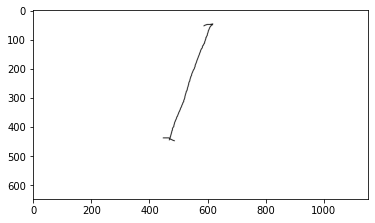

In [105]:
for label in LABEL:
    path=os.path.join(DATADIR_PATH,label)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap='gray')
        plt.show()

In [106]:
img_array

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [113]:
IMG_SIZE=200

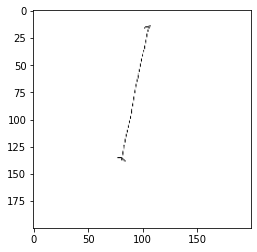

In [114]:
new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap='gray')
plt.show()

In [124]:
test_data2=[]
def creating_test_data():
    for label in LABEL:
        path=os.path.join(DATADIR_PATH,label)
        label_num=LABEL.index(label)
        for img in os.listdir(path):
            img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            test_data2.append([img_array,label_num])

In [125]:
creating_test_data()


In [126]:
len(test_data2)

5

AttributeError: 'list' object has no attribute 'shape'

In [148]:
batch_size=2
img_height=28
img_width=28

ds_test2=tf.keras.preprocessing.image_dataset_from_directory(
'C:/Users/61435/Desktop/SpringBoard_Assignments/Capstone Project 3/Capstone3/Raw Data/Self Drawn image',
    labels='inferred',
    label_mode='int',
    #class_names=[],
    color_mode='grayscale',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='validation'
    
)

Found 5 files belonging to 1 classes.
Using 1 files for validation.


In [154]:
def augment(x,y):
    image=tf.image.random_brightness(x,max_delta=0.05)
    return image,y


In [155]:
ds_test2_map=ds_test2.map(augment)

In [165]:
for epochs in range(5):
    for x,y in ds_test2_map:
        optimizer = optimizers.Adam(learning_rate=0.0001)
        model.compile(loss='categorical_crossentropy',
        optimizer=optimizer,
        metrics=['accuracy'])
        model.fit(ds_test2_map,epochs=epochs,verbose=2)
        

ValueError: in user code:

    C:\Users\61435\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:855 train_function  *
        return step_function(self, iterator)
    C:\Users\61435\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\61435\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\61435\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\61435\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\61435\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:838 run_step  **
        outputs = model.train_step(data)
    C:\Users\61435\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:795 train_step
        y_pred = self(x, training=True)
    C:\Users\61435\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\61435\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:255 assert_input_compatibility
        ' but received input with shape ' + display_shape(x.shape))

    ValueError: Input 0 of layer sequential_3 is incompatible with the layer: expected axis -1 of input shape to have value 784 but received input with shape (None, 28, 28, 1)


Epoch 1/10


ValueError: in user code:

    C:\Users\61435\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:855 train_function  *
        return step_function(self, iterator)
    C:\Users\61435\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\61435\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\61435\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\61435\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\61435\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:838 run_step  **
        outputs = model.train_step(data)
    C:\Users\61435\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:795 train_step
        y_pred = self(x, training=True)
    C:\Users\61435\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\61435\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:255 assert_input_compatibility
        ' but received input with shape ' + display_shape(x.shape))

    ValueError: Input 0 of layer sequential_3 is incompatible with the layer: expected axis -1 of input shape to have value 784 but received input with shape (None, 28, 28, 1)
